<a href="https://colab.research.google.com/github/rafael2ll/housing_clustering/blob/master/HousingClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clustering em dataset de dados de hospedagem na Califórnia
__Objetivo__: Determinar  grupos de hospedagem na Califórnia com semelhanças para futuros investimentos ou anániles

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

Using TensorFlow backend.


### Carregando dados
Como a coluna de numero de quartos possui alguns valores nulos, os substituí pela mediana da coluna

In [0]:
housing = pd.read_csv('housing.csv')
housing = housing.drop("ocean_proximity", axis =1)
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median)
housing_original = housing.copy()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [0]:
def plot_clusters(all_samples, centroids, n_samples_per_cluster):
    #Plot out the different clusters
    #Choose a different colour for each cluster
    colour = plt.cm.rainbow(np.linspace(0,1,len(centroids)))
    plt.rcParams["figure.figsize"] = [15, 15]
    for i, centroid in enumerate(centroids):
         #Grab just the samples fpr the given cluster and plot them out with a new colour
         samples = all_samples[int(i*n_samples_per_cluster):int((i+1)*n_samples_per_cluster)]
         plt.scatter(samples[:,0], samples[:,1], color=colour[i], label = "centroide_{0}: {1}".format(i, np.round(centroid)))
         #Also plot centroid
         plt.plot(centroid[0], centroid[1], markersize=10, marker="x", color='k', mew=10)
         plt.plot(centroid[0], centroid[1], markersize=10, marker="x", color='m', mew=5)
    
    plt.legend(loc='upper right')
    plt.show()

In [0]:
def choose_random_centroids(samples, n_clusters):
    # Step 0: Initialisation: Select `n_clusters` number of random points
    n_samples = tf.shape(samples)[0]
    random_indices = tf.random_shuffle(tf.range(0, n_samples))
    begin = [0,]
    size = [n_clusters,]
    size[0] = n_clusters
    centroid_indices = tf.slice(random_indices, begin, size)
    initial_centroids = tf.gather(samples, centroid_indices)
    return initial_centroids
    


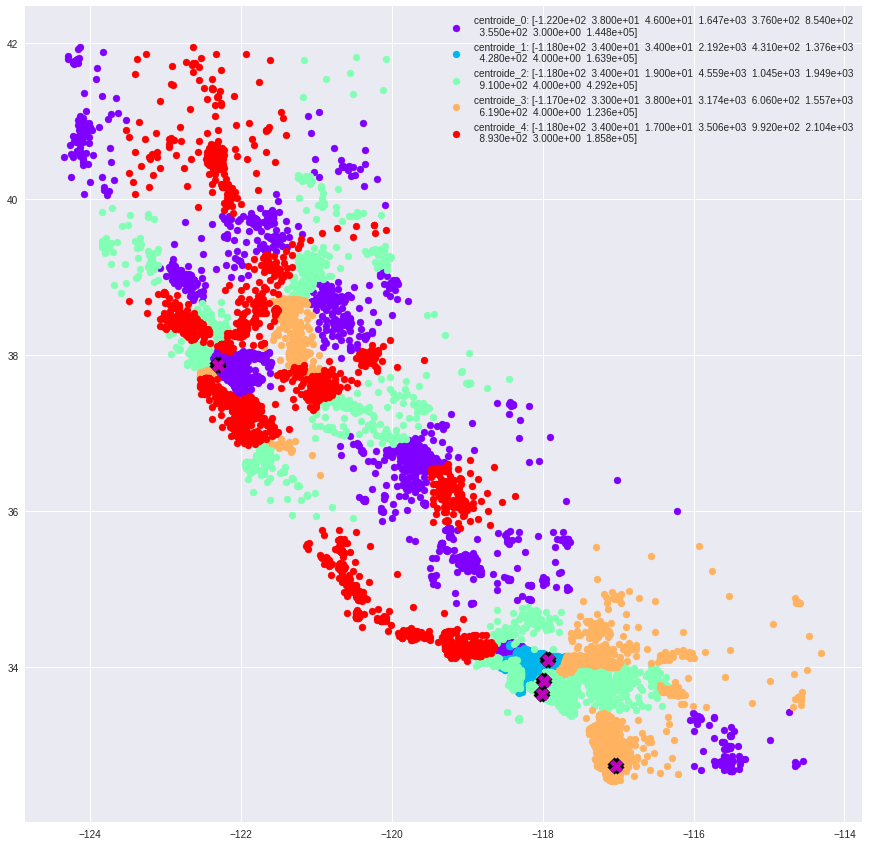

In [0]:
n_clusters = 5
housing = housing_original.copy()
samples= tf.constant(housing)
initial_centroids = choose_random_centroids(samples, n_clusters)

model = tf.global_variables_initializer()
with tf.Session() as session:
    sample_values = session.run(samples)
    updated_centroid_value = session.run(initial_centroids)

plot_clusters(sample_values, updated_centroid_value, len(housing)/n_clusters)

In [0]:
housing_latitude = housing.pop("latitude")
housing_longitude = housing.pop("longitude")
housing_price = housing.pop("median_house_value")
housing_price = pd.concat([housing_latitude, housing_longitude, housing_price], axis =1)

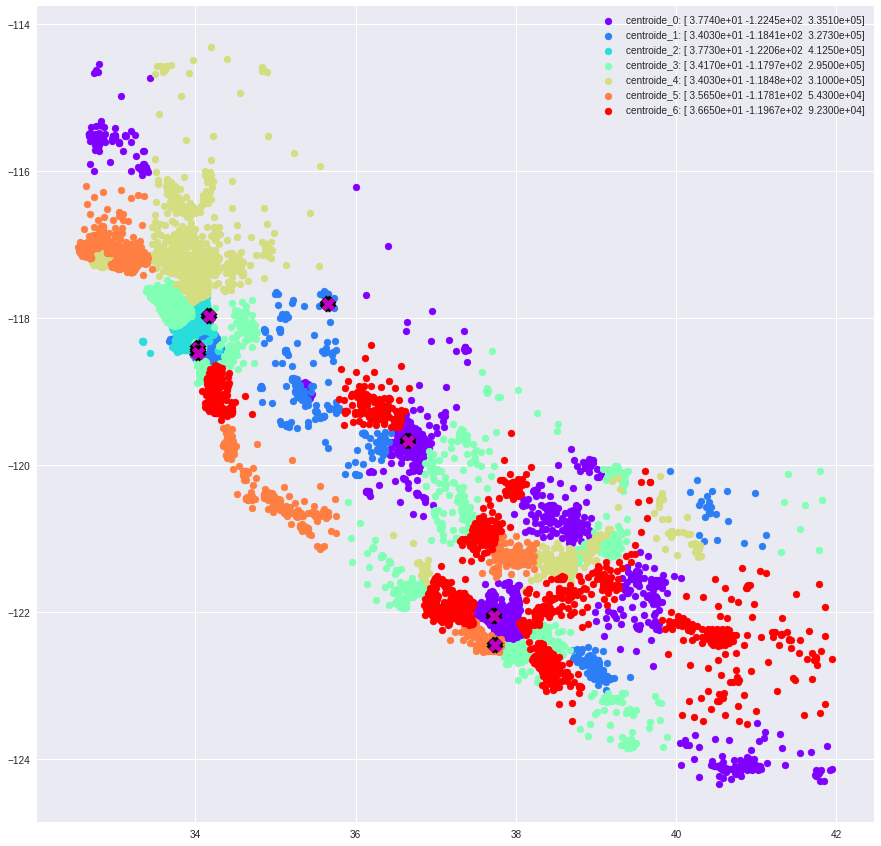

[[ 3.7740e+01 -1.2245e+02  3.3510e+05]
 [ 3.4030e+01 -1.1841e+02  3.2730e+05]
 [ 3.7730e+01 -1.2206e+02  4.1250e+05]
 [ 3.4170e+01 -1.1797e+02  2.9500e+05]
 [ 3.4030e+01 -1.1848e+02  3.1000e+05]
 [ 3.5650e+01 -1.1781e+02  5.4300e+04]
 [ 3.6650e+01 -1.1967e+02  9.2300e+04]]


In [0]:
n_clusters = 7
samples= tf.constant(housing_price)
initial_centroids = choose_random_centroids(samples, n_clusters)

model = tf.global_variables_initializer()
with tf.Session() as session:
    sample_values = session.run(samples)
    updated_centroid_value = session.run(initial_centroids)

plot_clusters(sample_values, updated_centroid_value, len(housing)/n_clusters)
print(updated_centroid_value)